<a href="https://colab.research.google.com/github/DDatachick/Loan-Prediction-app/blob/master/Loan_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#importation of Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# The preprocessing package provides transformations applied to your data before feeding it to the algorithm.
from sklearn import *
from sklearn.linear_model import LinearRegression, LogisticRegression


In [0]:
#importation of the training data into enviroment
train = pd.read_csv('train.csv')

In [74]:
# View the first 10 rows of dataset
train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [75]:
#The statistical discription of the available data
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [76]:
#Understanding all data types and count of data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [77]:
#unique values and frequencies for non numerical values 
train['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [0]:
# mapping out variables numerically
train['Property_Area'] = train['Property_Area'].map({'Semiurban':int(0),'Urban':int(1), 'Rural': int(2)})

In [79]:
train['Property_Area'].value_counts()

0    233
1    202
2    179
Name: Property_Area, dtype: int64

In [80]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [0]:
train['Loan_Status'] = train['Loan_Status'].map({'N':int(0),'Y':int(1)})

In [82]:
train['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [83]:
train['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [0]:
train['Self_Employed'] = train['Self_Employed'].map({'No':int(2),'Yes':int(1)})

In [123]:
train['Self_Employed'].value_counts()

Series([], Name: Self_Employed, dtype: int64)

Predicting Missing values


In [124]:
#noticed a lot of missing values in my dataframe
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        0 non-null float64
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null int64
Loan_Status          614 non-null int64
dtypes: float64(5), int64(3), object(5)
memory usage: 62.5+ KB


In [0]:
# Seperate the columns with no missing value
train_na = train.dropna()

In [91]:
train_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
Loan_ID              480 non-null object
Gender               480 non-null object
Married              480 non-null object
Dependents           480 non-null object
Education            480 non-null object
Self_Employed        480 non-null float64
ApplicantIncome      480 non-null int64
CoapplicantIncome    480 non-null float64
LoanAmount           480 non-null float64
Loan_Amount_Term     480 non-null float64
Credit_History       480 non-null float64
Property_Area        480 non-null int64
Loan_Status          480 non-null int64
dtypes: float64(5), int64(3), object(5)
memory usage: 52.5+ KB


In [0]:
#identify the relationship between variables
corr_train = train_na.corr()

In [93]:
corr_train
#postive values means when 1 variable increases the other increases
#Negative values means when 1 increases the other decreases.

,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Self_Employed,1.000000,-0.170785,0.001509,-0.120389,0.034852,0.023568,-0.037900,0.034715
ApplicantIncome,-0.170785,1.000000,-0.112588,0.495310,-0.010838,-0.056152,0.024586,-0.043152
CoapplicantIncome,0.001509,-0.112588,1.000000,0.190740,-0.005775,-0.008692,0.004348,-0.049020
LoanAmount,-0.120389,0.495310,0.190740,1.000000,0.050867,-0.040773,0.039807,-0.071753
Loan_Amount_Term,0.034852,-0.010838,-0.005775,0.050867,1.000000,0.032937,0.000568,-0.007798
Credit_History,0.023568,-0.056152,-0.008692,-0.040773,0.032937,1.000000,-0.040092,0.529390
Property_Area,-0.037900,0.024586,0.004348,0.039807,0.000568,-0.040092,1.000000,-0.153843
Loan_Status,0.034715,-0.043152,-0.049020,-0.071753,-0.007798,0.529390,-0.153843,1.000000


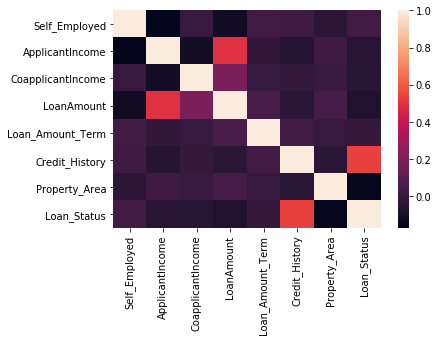

In [94]:
sns.heatmap(corr_train)

In [95]:
#Indentify variablles with significant corrolation with self employed
corr_train['Self_Employed'][abs(corr_train['Self_Employed'])>0.1]

Self_Employed      1.000000
ApplicantIncome   -0.170785
LoanAmount        -0.120389
Name: Self_Employed, dtype: float64

In [96]:
corr_train['LoanAmount'][abs(corr_train['LoanAmount'])>0.1]

Self_Employed       -0.120389
ApplicantIncome      0.495310
CoapplicantIncome    0.190740
LoanAmount           1.000000
Name: LoanAmount, dtype: float64

In [97]:
#no corrolation with any variable
corr_train['Loan_Amount_Term'][abs(corr_train['Loan_Amount_Term'])>0.1]

Loan_Amount_Term    1.0
Name: Loan_Amount_Term, dtype: float64

In [98]:
corr_train['Credit_History'][abs(corr_train['Credit_History'])>0.1]

Credit_History    1.00000
Loan_Status       0.52939
Name: Credit_History, dtype: float64

In [0]:
#set the variables into a liner regression form
y1 = train_na ['Self_Employed']
x1 = train_na ['LoanAmount']

In [100]:
#To use the variable in a liner regression model it has to reshaped
y1.shape

(480,)

In [0]:
y1 = y1.values.reshape(480,1)
x1 = x1.values.reshape(480,1)

In [102]:
linReg1 = LinearRegression()
linReg1.fit(x1,y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [108]:
train['Self_Employed'] = train.apply(lambda x: linReg1.predict(x['LoanAmount'].reshape(1,1))[0][0]if np.isnan(x['Self_Employed'])else x['Self_Employed'], axis=1)

AttributeError: ignored

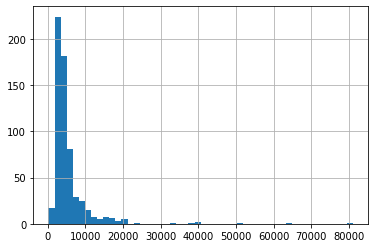

In [0]:
#Histogram of applicant incomes against population
train['ApplicantIncome'].hist(bins=50)

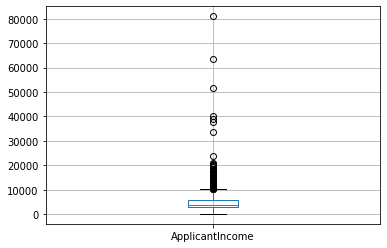

In [0]:
#Using whister boxplot to identifiy outliners
train.boxplot(column ='ApplicantIncome')

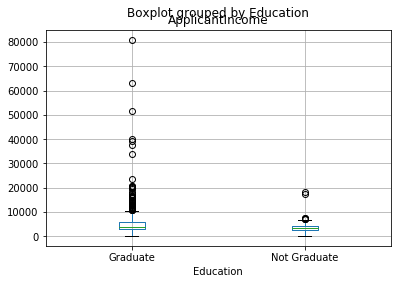

In [0]:
# To get a better understanding of the applicant income distribution. 
train.boxplot(column ='ApplicantIncome', by = 'Education' )

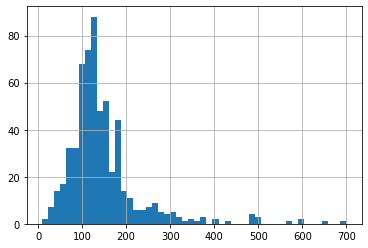

In [0]:
#Histogram forof the variable loan amount.
train['LoanAmount'].hist(bins=50)

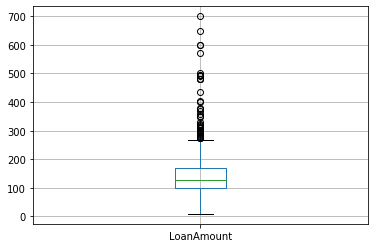

In [0]:
# boxplot of the variable loanamount to identify Outliner 
train.boxplot(column = 'LoanAmount')

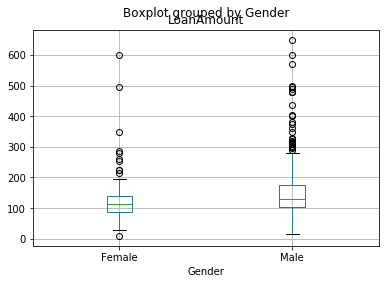

In [0]:
# boxplot of loan amount by gender
train.boxplot(column = 'LoanAmount', by = 'Gender')

 Distribution of Categorical Varaiables

In [0]:
#Identify number of loans approved
loan_approval = train ['Loan_Status'].value_counts()[1]
print(loan_approval)

422


In [0]:
# Trying to find relationships
pd.crosstab(train ['Credit_History'], train ['Loan_Status'],margins=True)

Loan_Status,0,1,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


In [0]:
# Reason: It was giving an error message that Credit_History was a key error
train = train.set_index('All')

KeyError: ignored

In [0]:
train.columns

Index(['Credit_History', 'N', 'Y'], dtype='object', name='Loan_Status')

In [0]:
def percentageConvert (ser):
  return ser/float(ser[-1])

  #loan aproval rate of customers with credit histroy 1
  
train = pd.crosstab(train ['Credit_History'], train ['Loan_Status'],margins=True).apply(percentageConvert, axis=1)
loan_approval_with_Credit = train['Y'][+1]
print(loan_approval_with_Credit_1*100)

KeyError: ignored

In [0]:
train['Y']

KeyError: ignored

In [0]:
#fill in missing values of self_employed
train['Self_Employed'].fillna('No',inplace=True)

KeyError: ignored

Outliners of Loan Amount and Applicant Income

In [0]:
train['TotalIncome'] = train['ApplicantIncome'] + train ['CoapplicantIncome']
train['LoanAmount'].hist(bins = 50)

KeyError: ignored

In [0]:
credit = train['Credit_History'].value_counts (ascending = True)
credit2 = train.pivot_table(values= 'Loan_Status',index = ['Credit_History'], aggfunc=lambda x:x.map({'Y': 1, 'N' : 0}).mean())
print ('Frequency Table for Credit History:')
print (credit)
print ('\n Probility of getting loan for each credit Histroy class:')
print (credit2)

KeyError: ignored

In [0]:
#To identify missing data
train.apply(lambda x :sum(x.isnull()),axis = 0)

Loan_Status
N      0
Y      0
All    0
dtype: int64

To fill missing values

In [0]:
train['LoanAmount'].fillna(train['LoanAmount'].mean(), inplace = True)

To deciede what to replace missing values with.


In [0]:
train['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [0]:
train('Self_Employed'.fillna('No',inplace = True))

AttributeError: ignored